In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl as ol
import os
import seaborn as sns
plt.rcParams['font.family'] = 'SimHei'
import chardet

In [2]:
path="C://Users//Dell//Desktop//2024“ShuWei Cup”_Problem//2024_“ShuWei Cup”D_Problem//Appendix 3"
for sub in os.listdir(path):
    path1=os.path.join(path,sub)
    with open(path1, 'rb') as f:
        rawdata = f.read()
        result = chardet.detect(rawdata)
        encoding = result['encoding']
    print(f"{sub}编码格式为: {encoding}")

Accommodation service data.csv编码格式为: UTF-8-SIG
Business-residential data.csv编码格式为: UTF-8-SIG
Car data.csv编码格式为: UTF-8-SIG
Finance and insurance data.csv编码格式为: UTF-8-SIG
Food and beverage service data.csv编码格式为: UTF-8-SIG
Geographical name and address information data.csv编码格式为: UTF-8-SIG
Government and social organizations data.csv编码格式为: UTF-8-SIG
Interior amenities data.csv编码格式为: UTF-8-SIG
Lifestyle service data.csv编码格式为: UTF-8-SIG
Medical and health data.csv编码格式为: UTF-8-SIG
Motorbike data.csv编码格式为: UTF-8-SIG
Public facilities data.csv编码格式为: UTF-8-SIG
Retail service data.csv编码格式为: UTF-8-SIG
Science, education, and culture data.csv编码格式为: UTF-8-SIG
Transportation facilities data.csv编码格式为: UTF-8-SIG


In [3]:
def extract(n,coding):
    path1="C://Users//Dell//Desktop//2024“ShuWei Cup”_Problem//2024_“ShuWei Cup”D_Problem"
    somepa="//Appendix {}".format(n+2)
    path2=path1+somepa
    total={}
    for sub in os.listdir(path2):
        path3=os.path.join(path2,sub)
        df = pd.read_csv(path3,encoding=coding)
        value_counts = df['type'].value_counts()
        sub=sub[:-4]
        total[sub]=dict(value_counts)
    return total
def remove(data):
    new_data={}
    for key in data.keys():
        subdict=data[key]
        new_subdict={}
        for ir in subdict.keys():
            if subdict[ir]>15:                
                new_subdict[ir]=subdict[ir]
        new_data[key]=new_subdict
    return new_data
data1=extract(1,"UTF-8-SIG")
data2=extract(2,"GB2312")
data2


{'Accommodation service data': {'宾馆酒店': 1191,
  '住宿服务相关': 792,
  '旅馆招待所': 270,
  '经济型连锁酒店': 69,
  '四星级宾馆': 40,
  '三星级宾馆': 39,
  '宾馆酒店|住宿服务': 11,
  '宾馆酒店|餐饮服务': 8,
  '住宿服务相关|生活服务': 6,
  '四星级宾馆|餐饮服务': 6,
  '旅馆招待所|住宿服务': 5,
  '五星级宾馆': 5,
  '五星级宾馆|餐饮服务': 4,
  '旅馆招待所|生活服务': 4,
  '宾馆酒店|生活服务': 2,
  '青年旅舍': 2,
  '三星级宾馆|餐饮服务': 1,
  '宾馆酒店|购物服务': 1,
  '旅馆招待所|体育休闲服务': 1},
 'Business-residential data': {'住宅小区': 2507,
  '商务住宅相关': 500,
  '商务写字楼': 349,
  '宿舍': 241,
  '住宅区': 230,
  '产业园区': 118,
  '商住两用楼宇': 45,
  '社区中心': 14,
  '别墅': 11,
  '住宅小区|商务住宅': 9,
  '楼宇相关': 8,
  '宿舍|商务住宅': 3,
  '商务写字楼|生活服务': 3,
  '住宅小区|餐饮服务': 2,
  '住宅小区|政府机构及社会团体': 2,
  '商务写字楼|科教文化服务': 2,
  '商务住宅相关|生活服务': 1,
  '住宅小区|生活服务': 1,
  '住宅小区|科教文化服务': 1,
  '商住两用楼宇|政府机构及社会团体': 1,
  '社区中心|生活服务': 1,
  '商务写字楼|公司企业': 1,
  '住宅小区|地名地址信息': 1,
  '住宅区|购物服务': 1,
  '商务写字楼|购物服务': 1,
  '产业园区|政府机构及社会团体': 1,
  '别墅|商务住宅': 1,
  '商住两用楼宇|商务住宅': 1},
 'Car data': {'汽车服务相关': 1217,
  '汽车配件销售': 1028,
  '汽车养护': 845,
  '洗车场': 365,
  '二手车交易': 171,
  '汽车租赁': 170,
  '

In [4]:
def standard(a,b):
    return a/(a+b),b/(a+b)
def onefeature(dict1,dict2):   #一个指标两个城市的处理，指标中的每一个类型进行标准化
    for i in dict1.keys():
        y=0
        for j in dict2.keys():
            if i==j:
                y=1
                dict1[i],dict2[j]=standard(dict1[i],dict2[j])yhcd
        if y==0:
            dict1[i]=1
            dict2[i]=0
        y=0
    for k in dict2.keys():
        if dict2[k]>=1:
            dict2[k]=1
            dict1[k]=0
def calscore(dict1,dict2):
    w=0;z=0
    for i in dict1.values():
        w+=i
    for j in dict2.values():
        z+=j
    return w,z
def main(data1,data2):
    score1={};score2={}
    for sub1 in data1.keys():
        for sub2 in data2.keys():
            if sub1==sub2:
                onefeature(data1[sub1],data2[sub2])
                a=calscore(data1[sub1],data2[sub2])
                score1[sub1]=a[0]
                score2[sub2]=a[1]               
    return score1,score2  

In [5]:
def density(all,data):
    for sub1 in data.keys():
        for sub2 in data[sub1].keys():
            data[sub1][sub2]=data[sub1][sub2]/all
def concat(data1,data2):
    index = ['Accommodation service data', 'Business-residential data', 'Car data', 'Finance and insurance data', 
             'Food and beverage service data', 'Geographical name and address information data', 
             'Government and social organizations data', 'Lifestyle service data', 'Medical and health data',
             'Motorbike data', 'Public facilities data', 'Retail service data', 'Science, education, and culture data',
             'Transportation facilities data']
    df1 = pd.DataFrame.from_dict(data1, orient='index', columns=['city1'])
    df2 = pd.DataFrame.from_dict(data2, orient='index', columns=['city2'])
    df=pd.concat([df1,df2],axis=1)
    df.rename(index={'Accommodation service data':"住宿服务", 'Business-residential data':"商旅服务", 'Car data':"汽车服务", 
                     'Finance and insurance data':"金融保险", 
             'Food and beverage service data':"饮食食品", 'Geographical name and address information data':"地名地址信息", 
             'Government and social organizations data':"政府社会组织", 
                     'Lifestyle service data':"生活方式",
                     'Medical and health data':"医疗健康",
             'Motorbike data':"摩托车服务", 'Public facilities data':"公共机构",
                     'Retail service data':"零售服务",
                     'Science, education, and culture data':"科研教育文化",
            'Transportation facilities data':"交通设施"},inplace=True)
    return df
def draw(df,index):
    plt.figure(figsize=(12, 8))
    bar_width = 0.35
    # 设置横坐标位置
    x = range(len(index))
    # 绘制第一个城市的数据柱形
    plt.bar([i - bar_width / 2 for i in x], df['city1'], width=bar_width, label='city1')
    # 绘制第二个城市的数据柱形
    plt.bar([i + bar_width / 2 for i in x], df['city2'], width=bar_width, label='city2')
    plt.xticks(x, index, rotation=45)
    plt.ylabel('得分')
    plt.title('两个城市的得分')
    plt.legend()
    plt.show()


In [28]:
def aspect(index,W,df):
    if len(index)==len(W):
        df= df.loc[index]
        for i,j in df.iterrows():
            df.loc[i][0],df.loc[i][1]=standard(j[0],j[1])  
        df= df.apply(lambda x: np.dot(x,W), axis=0)
    return df       

popu1=9101900
popu2=3604100
space1=24744
space2=17200
data1=extract(1,"UTF-8-SIG")
data2=extract(2,"GB2312")
data1=remove(data1)
data2=remove(data2)
density(popu1*space1,data1)
density(popu2*space2,data2)
w=main(data1,data2) 
df=concat(w[0],w[1])

index1=["商旅服务", "饮食食品", "医疗健康","交通设施"]#评价抗灾韧性
index2=["金融保险",  "政府社会组织", "公共机构","科研教育文化","交通设施"]#评价可持续性
W1=np.array([0.2,0.2,0.3,0.3])
W2=np.array([0.3,0.2,0.1,0.3,0.1])

print(aspect(index1,W1,df))
print(aspect(index2,W2,df))
# index=["住宿服务","商旅服务","汽车服务","金融保险", 
#          "饮食食品","地名地址信息", 
#          "政府社会组织", "生活方式", "医疗健康",
#          "摩托车服务","公共机构","零售服务","科研教育文化",
#          "交通设施"]
# draw(df,index)
# df.to_excel('C://Users//Dell//Desktop//2024“ShuWei Cup”_Problem//2024_“ShuWei Cup”D_Problem//各部门的得分比较.xlsx')
# df


city1    0.614588
city2    0.385412
dtype: float64
city1    0.606681
city2    0.393319
dtype: float64


           city1     city2
金融保险    0.178464  0.121536
政府社会组织  0.107434  0.092566
公共机构    0.059219  0.040781
科研教育文化  0.204684  0.095316
交通设施    0.056881  0.043119


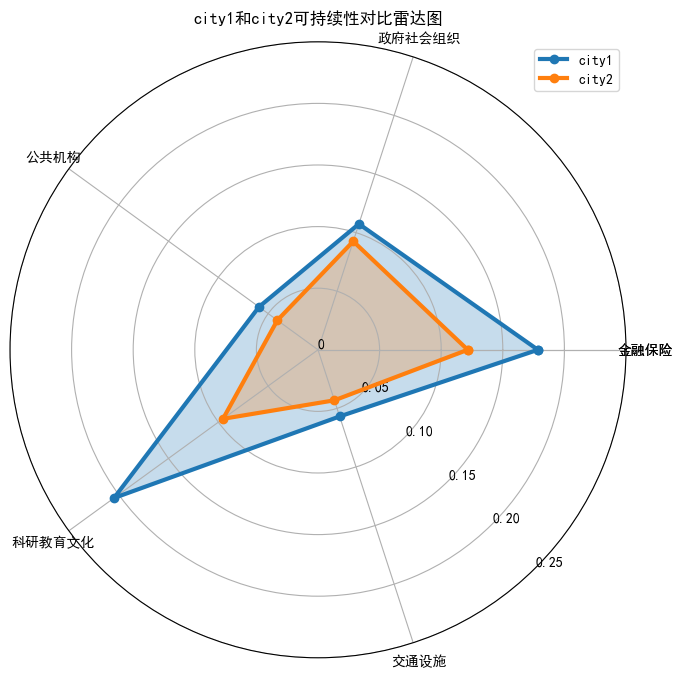

In [31]:
def radar(index,W,df,title):
    if len(index)==len(W):
        df= df.loc[index]
    for i,j in df.iterrows():
        df.loc[i][0],df.loc[i][1]=standard(j[0],j[1]) 
    df= df.apply(lambda x: x*W, axis=0)
    print(df)
    scores=df.values.T
    # 为了使雷达图闭合，需要将第一个角度添加到最后
    scores1 = np.concatenate((scores[0], [scores[0][0]]))
    scores2 = np.concatenate((scores[1], [scores[1][0]]))
#     scores1 = scores[0]
#     scores2 = scores[1]
#     print(scores1[0])
#     print(scores2)  
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, polar=True)
    angles = np.linspace(0, 2 * np.pi, len(index), endpoint=False)
    index= np.concatenate((index, [index[0]]))
    angles= np.concatenate((angles, [angles[0]]))
    ax.set_xticks(angles)
    ax.plot(angles, scores1, 'o-', linewidth=3, label='city1')
    ax.plot(angles, scores2, 'o-', linewidth=3, label="city2")
    ax.fill(angles, scores1, alpha=0.25)
    ax.fill(angles, scores2, alpha=0.25)
    ax.set_thetagrids(angles * 180 / np.pi,index)
    ax.set_title(title)
    ax.set_rlabel_position(-45)
    ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20, 0.25])
    ax.set_yticklabels(['0', '0.05', '0.10', '0.15', '0.20', '0.25'])
    ax.legend()
    plt.show()
radar(index2,W2,df,"city1和city2可持续性对比雷达图")

In [ ]:
path1="C://Users//Dell//Desktop//2024“ShuWei Cup”_Problem//2024_“ShuWei Cup”D_Problem//Appendix 3//Car data.csv"
df=pd.read_csv(path1)
value_counts = df['type'].value_counts()
dict(value_counts)